<a href="https://colab.research.google.com/github/s4kh4rov/BMIL/blob/master/task2_flowers_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [130]:
import cv2
import os
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import glob
import pandas as pd
import numpy as np
import chitra
from chitra.image import Chitra
from chitra.dataloader import Clf
from PIL import Image 
import PIL 
import matplotlib.image as mpimg
# pip install chitra

In [123]:
def yolo_to_coco(x_center, y_center, w, h,  image_w, image_h):
    w = w * image_w
    h = h * image_h
    x1 = ((2 * x_center * image_w) - w)/2
    y1 = ((2 * y_center * image_h) - h)/2
    return [x1, y1, w, h]

In [131]:
def show_images(filenames):
  for file in filenames:
    image = mpimg.imread(file)
    plt.figure()
    plt.imshow(image)

In [124]:
def prepare_dataset(path_dir,target_img_h,target_image_w,path_to_save_resized_img):
  # all txt annotations -> csv
  # resize image and save
  # recalculate bbox coordinates
  txt_file_list  =  glob.glob(path_dir+'*.txt')
  print("Общее количество txt файлов в директории ", len(txt_file_list))
  result_list = []
  for file in txt_file_list:
      related_image_filename = os.path.splitext(os.path.basename(file))[0]+".jpg"; 
      path_to_related_img = path_dir+related_image_filename;
      image_cv = cv2.imread(path_to_related_img)
      height, width, channels = image_cv.shape
      with open (file, 'r') as f:
          s_text_list = f.readlines()
          for line in s_text_list:
            li = list(line.split(" "))
            if(li[0] == '0'):
              lable = "flower"
              x1, y1, w, h = yolo_to_coco(float(li[1]),float(li[2]),float(li[3]),float(li[4]),width,height)
              bbox_coord = [x1,y1,x1 + w,y1+h]
              image = Chitra(path_to_related_img, bbox_coord, lable)
              image.resize_image_with_bbox((target_img_h, target_image_w))

              value = (related_image_filename,
                       target_image_w,
                       target_img_h,
                       lable,
                       image.bboxes[0].x1,
                       image.bboxes[0].y1,
                       image.bboxes[0].x2,
                       image.bboxes[0].y2)
              result_list.append(value)
      image.image.save(path_to_save_resized_img+related_image_filename)
  column_name = ['filename', 'width', 'height','class', 'xmin', 'ymin', 'xmax', 'ymax']
  xml_df = pd.DataFrame(result_list, columns=column_name)
  return xml_df

Исходные изображения


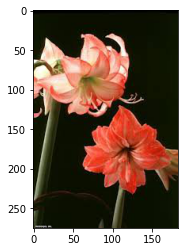

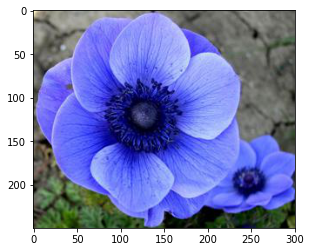

In [134]:

path_dir = '/content/drive/MyDrive/FlowerLabelsReal/'
path_to_save_resized_img = '/content/drive/MyDrive/FlowersResized/' 
target_img_h = 500
target_image_w = 500
print("Исходные изображения")
show_images([path_dir+"0a49f9219d.jpg",path_dir+"0ac4759c92.jpg"])

# xml_df = prepare_dataset(path_dir,target_img_h,target_image_w,path_to_save_resized_img)
# xml_df.to_csv("/content/drive/MyDrive/annotations.csv",index=None)

Изменен размер


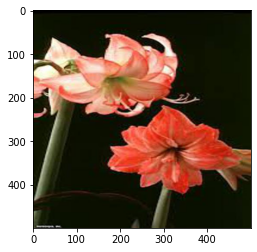

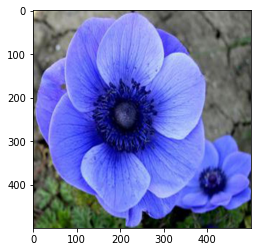

In [135]:
print("Изменен размер")
show_images([path_to_save_resized_img+"0a49f9219d.jpg",path_to_save_resized_img+"0ac4759c92.jpg"])